<a href="https://colab.research.google.com/github/Lidor-iluz/Python-project/blob/main/Covid-19%20Time%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Vaccination -Time Series Analysis (ARIMA)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv('CovidVaccinations.csv')
dataset.head()

,iso_code,continent,location,date,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
#Getting date,location,Vaccination_per_handred columns
df=dataset[['date','location','people_fully_vaccinated_per_hundred']]
df=df.sort_values(['location','date'])

df

,date,location,people_fully_vaccinated_per_hundred
312,1/1/2021,Afghanistan,NaN
321,1/10/2021,Afghanistan,NaN
322,1/11/2021,Afghanistan,NaN
323,1/12/2021,Afghanistan,NaN
324,1/13/2021,Afghanistan,NaN
...,...,...,...
133011,9/7/2021,Zimbabwe,11.55
132647,9/8/2020,Zimbabwe,NaN
133012,9/8/2021,Zimbabwe,11.74
132648,9/9/2020,Zimbabwe,NaN


In [5]:
#Create new columns based on distinct values and count them
df['eid'] = (df.groupby(['location']).cumcount()==0).astype(int)
df['eid'] = df['eid'].cumsum()

#Get vaccinations rate for Israel
ndf=df.loc[df['eid'] == df["eid"][df["location"] == 'Israel'].values[0]]
ndf=ndf.sort_values(['people_fully_vaccinated_per_hundred'])
ndf=ndf.dropna()

val = ndf['people_fully_vaccinated_per_hundred'].values
val

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e-02, 2.700e-01,
       6.600e-01, 1.270e+00, 2.010e+00, 2.390e+00, 2.670e+00, 3.580e+00,
       4.880e+00, 6.360e+00, 7.910e+00, 9.680e+00, 1.044e+01, 1.102e+01,
       1.253e+01, 1.403e+01, 1.539e+01, 1.673e+01, 1.814e+01, 1.883e+01,
       1.929e+01, 1.993e+01, 2.031e+01, 2.065e+01, 2.120e+01, 2.182e+01,
       2.213e+01, 2.237e+01, 2.311e+01, 2.381e+01, 2.454e+01, 2.532e+01,
       2.609e+01, 2.650e+01, 2.682e+01, 2.756e+01, 2.838e+01, 2.922e+01,
       3.003e+01, 3.089e+01, 3.130e+01, 3.161e+01, 3.245e+01, 3.332e+01,
       3.408e+01, 3.475e+01, 3.545e+01, 3.579e+01, 3.602e+01, 3.662e+01,
       3.728e+01, 3.798e+01, 3.870e+01, 3.955e+01, 3.998e+01, 4.025e+01,
       4.104e+01, 4.182e+01, 4.265e+01, 4.328e+01, 

In [15]:
pip uninstall scipy 

Found existing installation: scipy 1.4.1
Uninstalling scipy-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scipy-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.4.1


In [16]:
pip install scipy 

     |████████████████████████████████| 38.1 MB 1.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


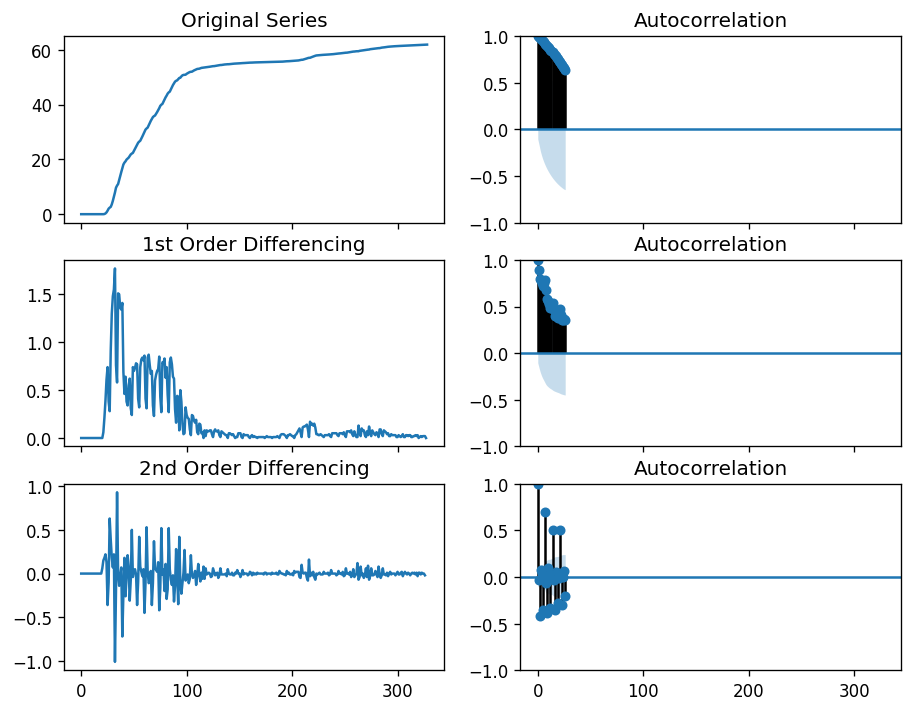

In [6]:
#Analyzing Autocorrelation and Deffrencing to make the time series stastionary 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(val), ax=axes[1, 1])
diffval = np.diff(val)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
plt.show()

In [7]:
pip install pmdarima

In [8]:
pip install pyramid-arima

     |████████████████████████████████| 515 kB 25.7 MB/s 
  ERROR: Failed building wheel for pyramid-arima
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
    Running setup.py install for pyramid-arima ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-jsyged5w/pyramid-arima_fac2e29e9b08414caa7b5f569715e467/setup.py'"'"'; __file__='"'"'/tmp/pip-install-jsyged5w/pyramid-arima_fac2e29e9b08414caa7b5f569715e467/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-ksqdrkuc/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pyramid-arima Check the logs 

In [9]:
#Using ADF test to find optimal value of diffrencing
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(val, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-355.801, Time=0.51 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-326.939, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-325.180, Time=0.24 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-326.207, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-328.939, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-385.051, Time=0.37 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-385.046, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-383.088, Time=0.58 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-395.078, Time=0.70 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-396.276, Time=0.96 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-395.590, Time=0.26 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-399.310, Time=1.00 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-395.889, Time=0.50 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-439.297, Time=1.14 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept

Best Model based on ACF --> ARIMA(3,2,3)

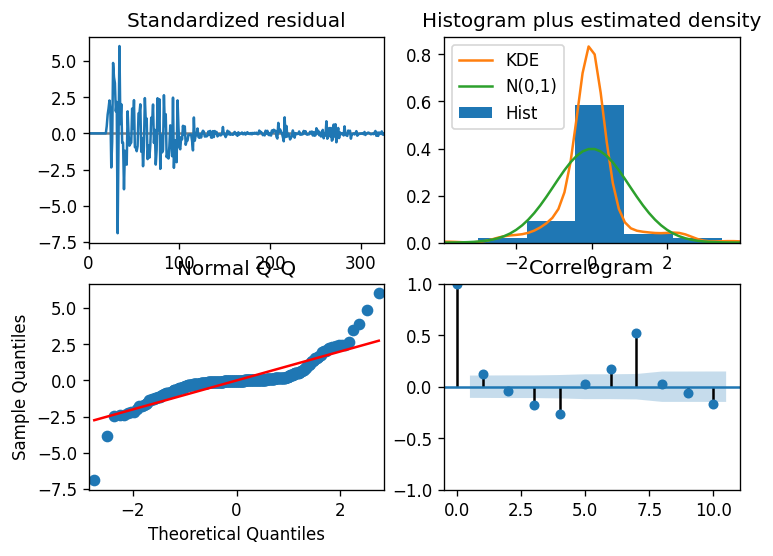

In [10]:
#diagnostic check for the residual
model.plot_diagnostics(figsize=(7,5))
plt.show()

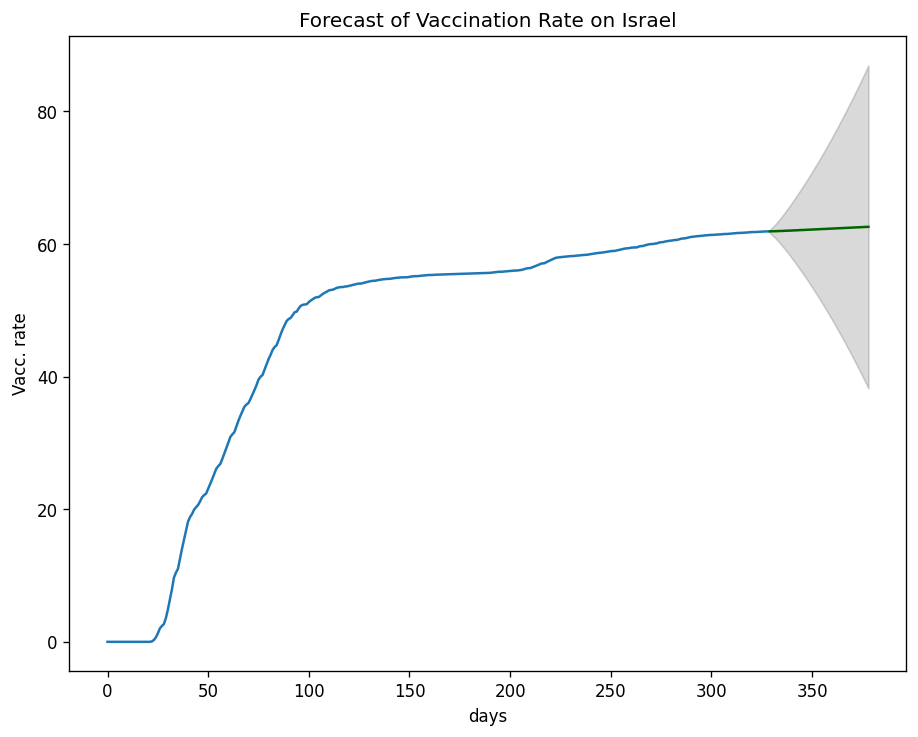

In [15]:
# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(val), len(val)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(val)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='k', alpha=.15)
plt.title("Forecast of Vaccination Rate on Israel")
plt.xlabel("days")
plt.ylabel("Vacc. rate")
plt.show()

## **The plot above shows the forcast of Vaccinations rate in green line on Israel based on the data.**